# 타이타닉 생존재 예측 경진대회 
* 1912년에 일어난 타이타닉호 침몰 사고를 소재로 하고 있습니다. 
* 타이타닉호 침몰 사고는 승객 2224명 중 1502명이 사망한 당시로서는 유례없는 해상 조난 사고였음 
* 승객의 성별과 연령, 승선 티켓 등급 등 여러 정보가 들어 있고, 이들의 생사 여부도 함께 주어짐
* 승객 정보를 보고 생사에 영향을 주는 속성이 무엇이며, 어떤 경향을 보이는지 파악한 후 생사 여부를 예측하는 것 (테스트 데이터)

In [6]:
import pandas as pd
import random
import numpy as np
np.random.seed(1234)
random.seed(1234)

In [7]:
train_df = pd.read_csv("./data/train.csv")

In [8]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# EDA
* 탐색적 데이터 해석

## 데이터의 행과 열 확인하기 

In [4]:
print (train_df.shape)

(891, 12)


### Pandas 내용 옵션 

In [5]:
#pd.set_option("display.max_columns", 50)
#pd.set_option("display.max_rows", 50)

In [6]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


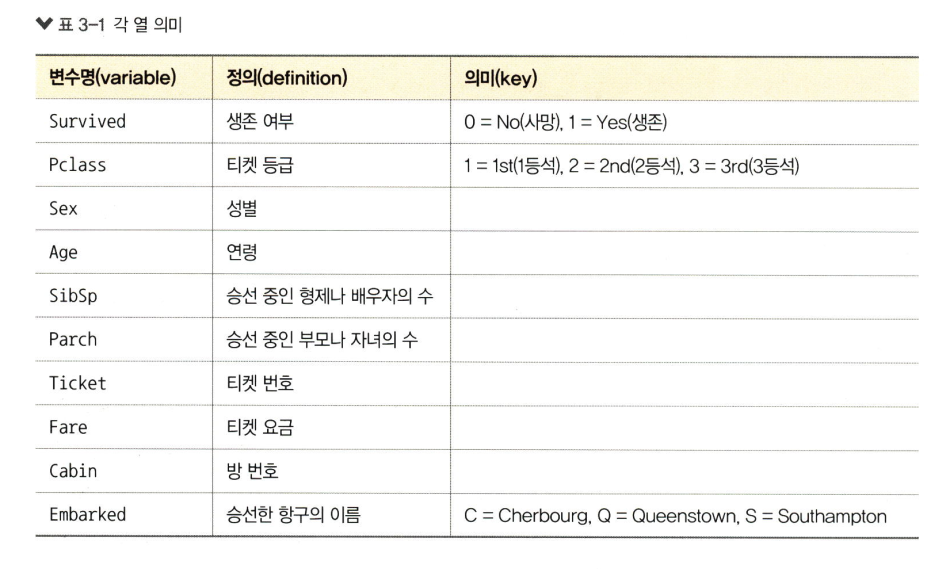

## 데이터 속성 확인하기
* 속성이란 그 데이터가 수치인지 문자열인지 등을 나타내는 것 
* 수치에는 정수인 int형이나 소수인 float형이 존재 
* int나 float 뒤의 숫자는 bit수를 나타내며, 수가 클수록 표현할 수 있는 범위가 커집니다. 

In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 질적변수(범주형 데이터, Cateogory)
* 분류를 위한 수치로 수치 사이의 간격에 큰 의미가 없는 경우 
* 티켓 등급이 바로 질적변수
* 질적변수는 다시 명목 척도와 순서 척도로 분류되는데, 먼저 명목 척도는 '단지 분류를 위한 것'으로 방 번호나 티켓 번호 같은 것이 해당 
* 순서척도는 질적 변수 중에서도 특히 '순서에 의미가 있는 것'을 의미 
* 예를 들어 Pclass는 질적 변수 중에서도 순서 척도로 분류 

## 양적변수 
* 나이, 티켓 요금과 같이 간격에 의미가 있는 수치 
* 양적 변수는 다시 간격 척도와 비례 척도로 분류할 수 있음 
* 간격 척도란 같은 간격의 눈금으로 측적하는 것 
* 비례 척도란 간격 척도의 조건을 만족시키는 것 중 원점이 있어서 데이터 비율에 의미를 갖게 되는 것
* Fare는 비례 척도임 ( 3달러짜리 티켓은 1달러짜리 티켓보다 세 배 비싸다'라고 할 수 있기 때문임...)

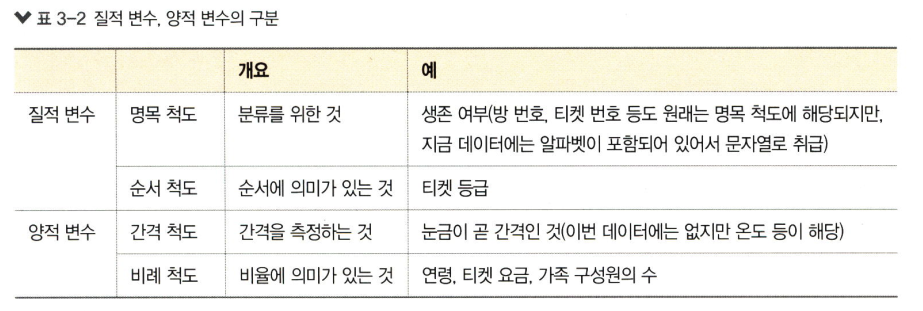

## 데이터의 통계량 확인하기 
* 주어진 데이터 중 먼저 수치 데이터 개요를 파악 
* pandas의 descripbe() 메서드를 사용하여 컬럼의 평균이나 분산등의 기술적 통계량을 볼 수 있습니다. 

In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 카테고리 변수 확인하기
* 성별이나 승선 항구 등 카테고리된 변수를 확인

In [8]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

* S는 Southampton
* C는 Cherbourg
* Q는 Queenstown
* Southampton에서 승선한 고객이 가장 많고, 이때 승선한 남성이 여성의 두 배 정도라는 것을 알 수 있음
* Cabin은 복수의 방 번호가 기재되어 있는 경우가 있으니 분석에 사용할 때 주의해야 함 

## 결측치 확인
* 변수에 결측치(아무 값도 들어 있지 않은 것, null)가 있는지 확인 
* isnull()을 사용하면 행과 열별로 결측치의 존재 여부를 판정할 수 있음 
* isnull().sum()을 동시에 사용하면 컬럼별 결측치의 개수를 파악할 수 있음

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 데이터의 시각화
* 데이터의 시각화에는 matplotlib와 seaborn를 많이 사용함 
* %matplotlib inline은 주피터 노트북 안에서 그래프를 표시하려고 의미 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

* matplotlib의 시각화 스타일이 matlab 스타일이기 때문에 미려한 효과를 주기 위해서 ggplot 스타일로 변경 

In [10]:
plt.style.use('ggplot')

## 목적 변수 관련 데이터의 시각화 
* 목적변수(Y값) Survived에 관한 데이터 시각화 진행 

### DataFrame에서 임의의 열 추출하기 
* Survived의 값(생존 :1, 사망 :0)별로 각 값에 차이가 있는지 확인 

In [11]:
train_df[['Embarked', 'Survived', 'PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


### 시각화하고 싶은 데이터에서 결측치 제외하기 

In [14]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


## Embarked와 Survived로만 집계하기 

In [15]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

* unstack()으로 수직 데이터를 수평 데이터 형태로 변형

In [16]:
embarked_df = train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()

### 누적 막대 그래프로 시각화하기 
* 누적 막대 그래프를 이용하므로 stacked=True로 설정

<Axes: xlabel='Embarked'>

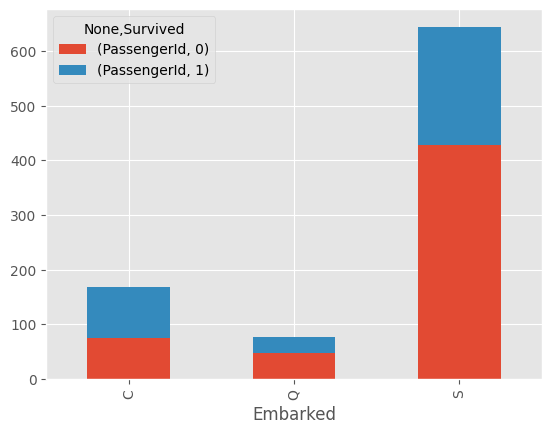

In [17]:
embarked_df.plot.bar(stacked=True)

* 비율 파생 변수 추가 

In [18]:
embarked_df['survived_rate'] = embarked_df.iloc[:, 0] / ( embarked_df.iloc[:, 1] + embarked_df.iloc[:, 1] )

## 성별과 티켓 등급 시각화

In [19]:
sex_df = train_df[['Sex', 'Survived', 'PassengerId']].dropna().groupby(['Sex', 'Survived']).count().unstack()

<Axes: xlabel='Sex'>

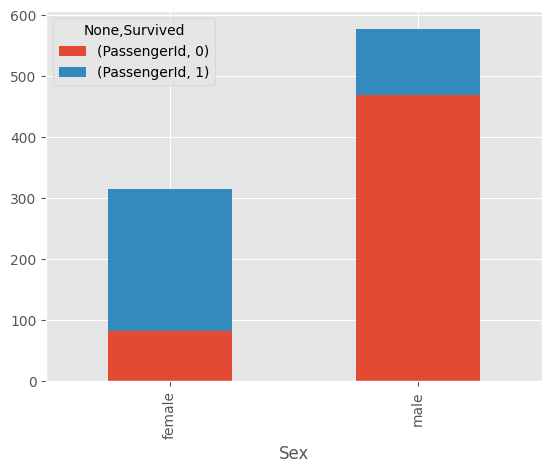

In [20]:
sex_df.plot.bar(stacked=True)

In [21]:
ticket_df = train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass', 'Survived']).count().unstack()

<Axes: xlabel='Pclass'>

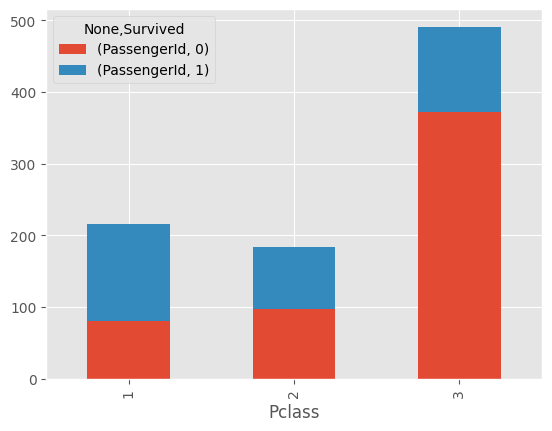

In [22]:
ticket_df.plot.bar(stacked=True)

* 여성이 남성보다 생존율이 높고, 티켓 등급이 높을수록 생존율이 높음

## 연령별 생존율을 히스토그램으로 시각화
* 여러 히스토그램이 동시에 보이게 하려면 인수의 histtype을 barstacked로 지정 
* 그 외 인수로는 히스토그램 빈 개수를 나타내는 bins, 라벨을 지정하는 label등이 있음
* label를 지정하면 plt.legend()를 써서 그래프 내부에 라벨을 표시

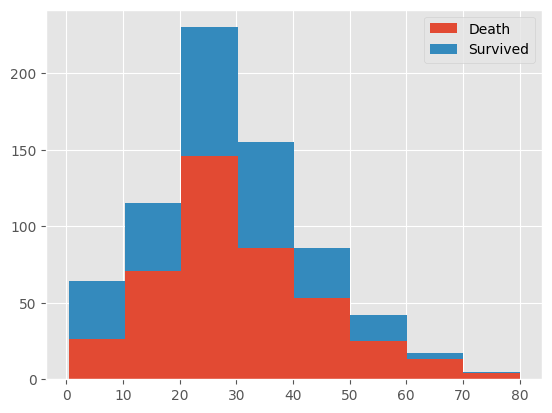

In [23]:
plt.hist(x = [train_df.Age[train_df.Survived == 0 ], train_df.Age[train_df.Survived==1]], 
            bins = 8, histtype='barstacked', label=['Death', 'Survived'])
plt.legend()

## 카테고리 변수를 더미 변수화하기
* 각 변수와 Survived 변수 간 상관성을 분석
* 상관관계의 계산이나 머신러닝 등 처리는 수치 데이터에서만 실행할 수 있음
* 카테고리 변수를 수치 데이터로 변환

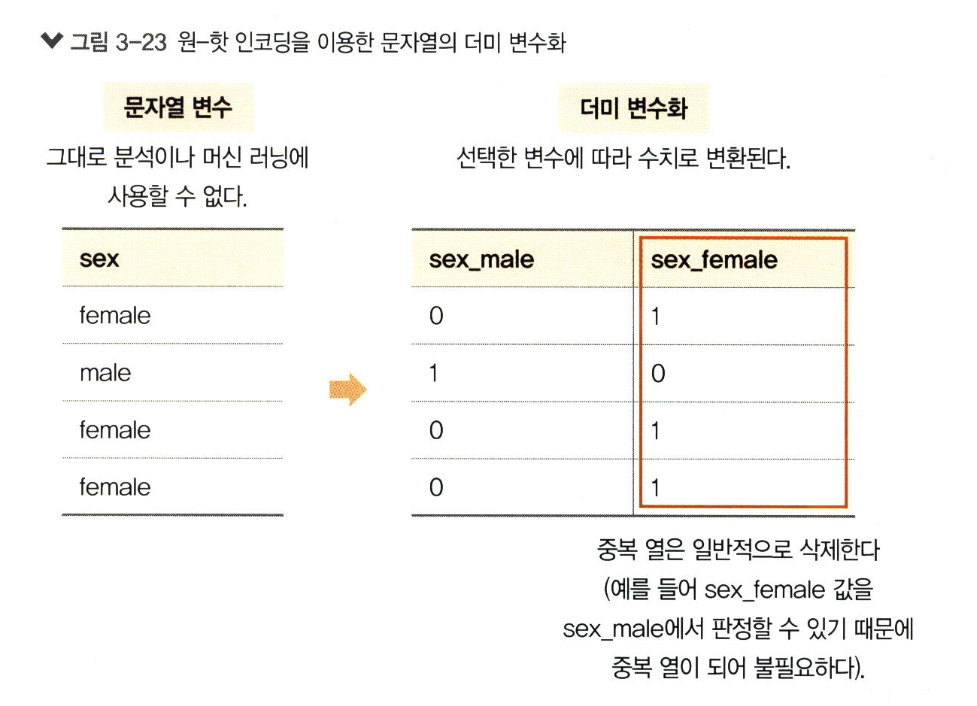

In [12]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"],drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])

## 상관 행렬 작성하기 

In [13]:
train_df_corr.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True


In [14]:
train_corr = train_df_corr.drop(['Name', 'Ticket', 'Cabin'], axis=1).corr()

## 히트맵으로 시각화하기

In [16]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

NameError: name 'sns' is not defined

<Figure size 900x900 with 0 Axes>

# 데이터 전처리와 특징 값 생성 
* 데이터에는 변환 없이 그대로 머신 러닝에서 사용하기 어려운 형태가 포함되어 있습니다. 
* 일단 모델이 읽어 들일 수 있지만, 더 좋은 형태로 변형시키는 편이 정확도가 좋아지는 것들도 있습니다. 
* 결측치도 있었기 때문에 그것을 처리하는 것도 생각해야 합니다. 
* 이런 과정을 데이터의 전처리 과정이라고 합니다. 

## 전처리할 데이터
* Fare(티켓 요금)
* Name(성씨, 호칭, 이름)
* Parch(승선 중인 부모나 자녀의 수), SibSp(승선 중인 형제나 배우자의 수)

## Fare 결측치 메우기 
* Fare 값에 결측치가 하나 존재
* 이 값을 채우기 위해 먼저 Pclass별 Fare의 평균을 구한 후 Pclass의 평균값으로 해당 결측치를 채우는 방법을 사용 

In [17]:
Fare_mean = train_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

In [18]:
Fare_mean

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [19]:
Fare_mean.columns = ["Pclass","Fare_mean"]

In [20]:
all_df = pd.merge(train_df, Fare_mean, on="Pclass",how="left")

In [21]:
all_df.loc[(all_df["Fare"].isnull()), "Fare"]
# 결측치의 iloc의 값에 all_df['Fare_mean']의 iloc의 값이 대입 
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
# Fare_mean 컬럼 삭제 
all_df = all_df.drop("Fare_mean",axis=1)

## Name 호칭에 주목하기 

In [33]:
all_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* 호칭을 변수로 추가 
* Name을 str을 써서 문자열로 취득한 후 split()를 사용하여 ,나 . 마침표로 구분하면 0부터 세기 시작해서 2번째 나오는 요소(즉, 1번째)가 호칭이 됨 

In [34]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
all_df["Name"].str.split("[,.]",expand=True)

,0,1,2,3
0,Braund,Mr,Owen Harris,None
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,Heikkinen,Miss,Laina,None
3,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,Allen,Mr,William Henry,None
...,...,...,...,...
886,Montvila,Rev,Juozas,None
887,Graham,Miss,Margaret Edith,None
888,Johnston,Miss,"Catherine Helen ""Carrie""",None
889,Behr,Mr,Karl Howell,None


In [23]:
name_df = all_df["Name"].str.split("[,.]",expand=True).iloc[:, :3]

In [24]:
name_df.columns = ["family_name","honorific","name"]

* 위의 결과를 바탕으로 3개의 파생변수 생성 

In [25]:
name_df["family_name"] =name_df["family_name"].str.strip()
name_df["honorific"] =name_df["honorific"].str.strip()
name_df["name"] =name_df["name"].str.strip()

## 호칭마다 인원수 세기 
* honorific별 인원수를 세기 

In [26]:
name_df['honorific'].value_counts()

honorific
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

## 호칭별 연령 분포 확인하기 
* 호칭별 연령 분포를 확인하기 위해서 all_df와 name_df를 결합합니다. 
* aixs 옵션을 1로 설정하여 세로로 결합하지 않고 가로로 결합합니다. 

In [27]:
# axis=의 값을 1로 설정하여 두 df를 가로로 결합 
all_df = pd.concat([all_df, name_df],axis=1)

* boxplot은 데이터의 분포를 확인할 수 있는 좋은 그림이다. 
* sns의 기능을 이용하여 시각화한다 

In [28]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

NameError: name 'sns' is not defined

<Figure size 1800x500 with 0 Axes>

## 호칭별 연령 평균값 확인하기 
* 각 호칭의 연령 평균값도 확인해보겠습니다. 

In [29]:
all_df[["Age","honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


In [30]:
all_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina


## 호칭별 생존율 차이 확인하기 
* 호칭에 따라 평균 연령에 차이가 있음이 확인되었습니다. 
* 이제 호칭에 따라 생존율에도 차이가 있는지 확인해봅시다. 

* train_df에서 honorific, Survived, PassengerId를 빼낸 후 결측치를 포함한 행을 삭제하고 honorific, Survived별로 인원수를 집계

<Axes: xlabel='honorific'>

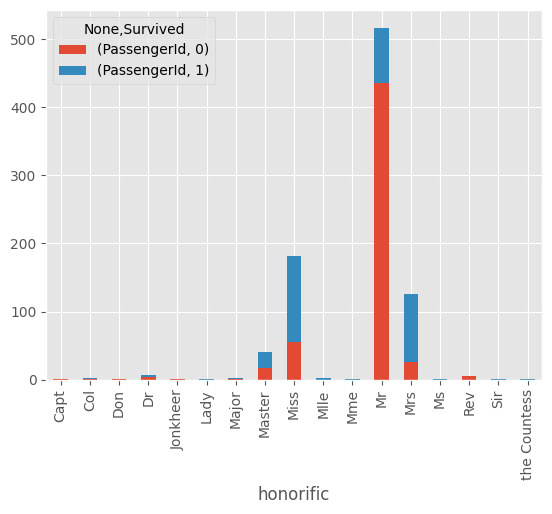

In [31]:
honorific_df = all_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

* 여성에게 사용되는 Miss나 Mrs는 생존율이 높은 반면, 남성에게 사용되는 Mr는 사망률이 높은 것으로 나타남 
* 또 남성 중에서도 젊은 남성에게 사용되는 Master는 Mr와 비교할 때 생존율이 높습니다. 
* 앞서 서술한 연령, 성별 생존율과 같은 경향을 띱니다. 
* 연령은 결측치가 많은 데이터이므로 여기서 구한 호칭 데이터가 연령을 보완하는 효과적인 변수가 될 가능성이 있습니다. 

## 연령의 결측치를 호칭별 평균 연령으로 보완하기 
* 원래 데이터에 호칭별 평균 연령을 추가하고, 그 후에 연령이 결손된 곳을 호칭의 평균 연령으로 보충을 진행 
* honorific_Age는 불필요하므로 삭제 

In [32]:
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific","honorific_Age"]

In [33]:
honorific_age_mean

,honorific,honorific_Age
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.773973
9,Mlle,24.000000


In [34]:
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"],axis=1)

## 가족 인원수 추가하기 
* Parch(승선 중인 부모나 자녀의 수)와 SibSp(승선 중인 형제나 배우자의 수)라는 가족과 관련한 변수가 두 개 포함 
* 따라서 우선 이들 변수를 더해 family_num(가족수)를 만들어 보겠습니다. 

In [35]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [36]:
all_df["family_num"].value_counts()

family_num
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

## 홀로 승선했는지 여부를 새로운 변수로 추가하기
* 가족 인원수를 확인하면 함께 배에 탄 가족 수가 0명, 즉 1명이 승선한 경우가 절반이상입니다. 
* 타이타닉호의 조난과 같은 상황이라면 가족이 함께 행동했을 가능성이 있습니다. 
* 따라서 1명인지 아니면 같은 승선 가족이 있는지가 생존에 영향을 줄 수 있으므로 alone(1이면 1명, 그렇지 않으면 0)이라는 변수를 추가하겠습니다. 

In [37]:
all_df.loc[all_df["family_num"] ==0, "alone"] = 1
all_df.fillna({'alone' : 0}, inplace=True)

## 불필요한 변수 삭제하기 
* PassengerId는 단순히 승객의 ID이므로 예측에 불필요 
* Name도 파생변수로 만들었으니 불필요
* 파생변수의 name은 고유 명사이니 불필요 
* family_name도 혼자 탑승한 인원이 많기 때문에 가족 단위 분석이 어려운 문제로 삭제 

In [38]:
all_df = all_df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"],axis=1)

## 카테고리 변수를 수치로 변환하기 
* 변수 형태가 object인 것을 카테고리 변수로 변환 

In [39]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


## Mr, Miss, Mrs, Master 이외는 other로 통합하기 
* 해당 이외의 호칭은 데이터수가 적기 때문에 학습이 잘 안될 수 있다. 
* other이라는 값으로 통합 

In [40]:
all_df.loc[~((all_df["honorific"] =="Mr") |
    (all_df["honorific"] =="Miss") |
    (all_df["honorific"] =="Mrs") |
    (all_df["honorific"] =="Master")), "honorific"] = "other"

In [41]:
all_df.honorific.value_counts()

honorific
Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: count, dtype: int64

## 문자열을 수치로 변환하기 : 라벨 인코딩 
* pd.get_dummies()를 사용하여 one-hot으로 변경하거나 
* label encoding으로 변환가능 
* one-hot은 카테고리의 수에 따라서 변수가 증가
* label encoding은 변수의 수는 그대로 유지 

In [42]:
from sklearn.preprocessing import LabelEncoder

* LabelEncoder()는 결측치가 있으면 작동하지 않기 때문에 Embarked에 포함된 결측치는 missing등의 임의의 문자열로 변환 

In [43]:
all_df.fillna({"Embarked": "missing"}, inplace=True)

In [44]:
categories

Index(['Sex', 'Embarked', 'honorific'], dtype='object')

In [45]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":    
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [46]:
y_data = all_df.Survived
X_data = all_df.drop('Survived', axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2)

In [48]:
#Label-Encoding
y_train

125    1
305    1
631    0
643    1
808    0
      ..
204    1
53     1
294    0
723    0
815    0
Name: Survived, Length: 712, dtype: int64

In [49]:
X_train.shape

(712, 10)

Pytorch

In [2]:
import torch
import torch.nn as nn

In [3]:
class titanic(nn.Module):
    def __init__(self):
        pass
        #부모를 소환해서 초기화 
        super(titanic, self).__init__()
        #층 생성
        self.fc1 = nn.Linear(10, 12)
        self.fc2 = nn.Linear(12, 6)
        self.fc3 = nn.Linear(6,1) 
        
    def forward(self, x):
        x = self.fc1(x)
        #Linear가 relu, 즉 비선형으로 바뀜
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x) 
        x = nn.functional.sigmoid(x)
        return x 

In [4]:
model = titanic()

In [5]:
model.summary()

AttributeError: 'titanic' object has no attribute 'summary'

In [58]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [59]:
n_epochs = 15
batch_size = 32

In [60]:
X_train.values

array([[ 3.        ,  1.        , 12.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.92      , ...,  0.        ,
         3.        ,  0.        ],
       [ 3.        ,  1.        , 51.        , ...,  2.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        ,  1.        , 24.        , ...,  2.        ,
         0.        ,  1.        ],
       [ 2.        ,  1.        , 50.        , ...,  2.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 32.36809045, ...,  2.        ,
         0.        ,  1.        ]])

In [61]:
#토치가 알아들을 수 있는 데이터 형식으로 변환
torch.tensor(X_train.values, dtype = torch.float32)

tensor([[ 3.0000,  1.0000, 12.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  1.0000,  0.9200,  ...,  0.0000,  3.0000,  0.0000],
        [ 3.0000,  1.0000, 51.0000,  ...,  2.0000,  0.0000,  1.0000],
        ...,
        [ 3.0000,  1.0000, 24.0000,  ...,  2.0000,  0.0000,  1.0000],
        [ 2.0000,  1.0000, 50.0000,  ...,  2.0000,  0.0000,  1.0000],
        [ 1.0000,  1.0000, 32.3681,  ...,  2.0000,  0.0000,  1.0000]])

In [62]:
X_train_torch = torch.tensor(X_train.values, dtype = torch.float32)

In [71]:
y_train_torch = torch.tensor(y_train.values, dtype = torch.float32).reshape(-1,1)

In [72]:
y_train_torch

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [73]:
y.shape

torch.Size([712, 1])

In [74]:
X_train_torch.shape

torch.Size([712, 10])

In [69]:
X_val = torch.tensor(X_valid.values, dtype=torch.float32)
y_val = torch.tensor(y_valid.values, dtype=torch.float32).reshape(-1, 1)

In [67]:
torch.arange(0, len(X_train_torch), batch_size)

tensor([  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416,
        448, 480, 512, 544, 576, 608, 640, 672, 704])

In [77]:
import tqdm
batch_start = torch.arange(0, len(X_train_torch), batch_size)
for epoch in range(n_epochs):
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train_torch[start:start+batch_size]
            y_batch = y_train_torch[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            acc = (y_pred.round() == y_batch).float().mean()
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc))
    model.eval()
    y_pred = model(X_val)
    acc = (y_pred.round() == y_val).float().mean()
    acc = float(acc)
    print(acc)

0.7709497213363647
0.8044692873954773
0.7821229100227356
0.7988826632499695
0.7932960987091064
0.7932960987091064
0.8044692873954773
0.8100558519363403
0.8212290406227112
0.8100558519363403
0.8100558519363403
0.8100558519363403
0.8100558519363403
0.8044692873954773
0.8100558519363403


In [78]:
import tqdm

def train_model(model, X_train_torch, y_train_torch, X_val, y_val):
    batch_start = torch.arange(0, len(X_train_torch), batch_size)
    
    for epoch in range(n_epochs):
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                X_batch = X_train_torch[start:start+batch_size]
                y_batch = y_train_torch[start:start+batch_size]
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                #미분된 값은 초기화 
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(loss=float(loss), acc=float(acc))
            
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        print(acc) 

In [79]:
train_model(model, X_train_torch, y_train_torch, X_val, y_val)

Epoch 0: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 399.81batch/s, acc=0.75, loss=0.697]


0.7932960987091064


Epoch 1: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 425.43batch/s, acc=0.75, loss=0.698]


0.7988826632499695


Epoch 2: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 458.80batch/s, acc=0.75, loss=0.665]


0.7988826632499695


Epoch 3: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 222.19batch/s, acc=0.75, loss=0.657]


0.8044692873954773


Epoch 4: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 360.19batch/s, acc=0.75, loss=0.682]


0.7988826632499695


Epoch 5: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 472.87batch/s, acc=0.75, loss=0.662]


0.7877094745635986


Epoch 6: 100%|█████████████████████████████████████████████████| 23/23 [00:00<00:00, 428.23batch/s, acc=0.75, loss=0.65]


0.8044692873954773


Epoch 7: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 487.80batch/s, acc=0.75, loss=0.647]


0.7988826632499695


Epoch 8: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 480.49batch/s, acc=0.75, loss=0.636]


0.8044692873954773


Epoch 9: 100%|████████████████████████████████████████████████| 23/23 [00:00<00:00, 469.14batch/s, acc=0.75, loss=0.632]


0.8100558519363403


Epoch 10: 100%|███████████████████████████████████████████████| 23/23 [00:00<00:00, 457.58batch/s, acc=0.75, loss=0.651]


0.8044692873954773


Epoch 11: 100%|███████████████████████████████████████████████| 23/23 [00:00<00:00, 492.47batch/s, acc=0.75, loss=0.616]


0.8044692873954773


Epoch 12: 100%|███████████████████████████████████████████████| 23/23 [00:00<00:00, 444.17batch/s, acc=0.75, loss=0.611]


0.8044692873954773


Epoch 13: 100%|███████████████████████████████████████████████| 23/23 [00:00<00:00, 475.69batch/s, acc=0.75, loss=0.635]


0.8044692873954773


Epoch 14: 100%|███████████████████████████████████████████████| 23/23 [00:00<00:00, 444.23batch/s, acc=0.75, loss=0.648]


0.7877094745635986


In [80]:
model.state_dict()['fc1.weight'].shape

torch.Size([12, 10])

In [81]:
model.state_dict().keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

In [82]:
model.state_dict()['fc1.bias'].shape

torch.Size([12])

In [83]:
print(model)

titanic(
  (fc1): Linear(in_features=10, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=1, bias=True)
)


# 머신러닝 모델링

## LightGBM
* 최근에는 병렬러 앙상블하는 것이 아니라 결정 트리를 순서대로 갱신해 나가는 그레디언트 부스팅 결정 트리(gradient boosting decision tree) 기법이 제안 
* 이것을 구현하는 방법 중 하나가 바로 LightGBM입니다. 
* 그레디언트 부스팅 결정 트리의 구현 방법에는 LigthGBM과 XGBoost가 있습니다. 
----------------
* LightGBM은 매주 자주 사용되는 기법 중 하나로 아래의 장점이 있습니다. 

1. 실행 속도가 다른 기법들(XGBoost나 딥러닝)보다 빠르다 

2. 결측치나 카테고리 변수가 포함된 상태에서도 모델을 학습시킬 수 있다. 

In [90]:
import lightgbm as lgb
print(lgb.__version__)

4.5.0


## 과적합과 과소적합 
### 교차검증

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2)

In [93]:
categories = ["Embarked", "Pclass", "Sex","honorific","alone"]

In [94]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid,  categorical_feature=categories, reference=lgb_train)

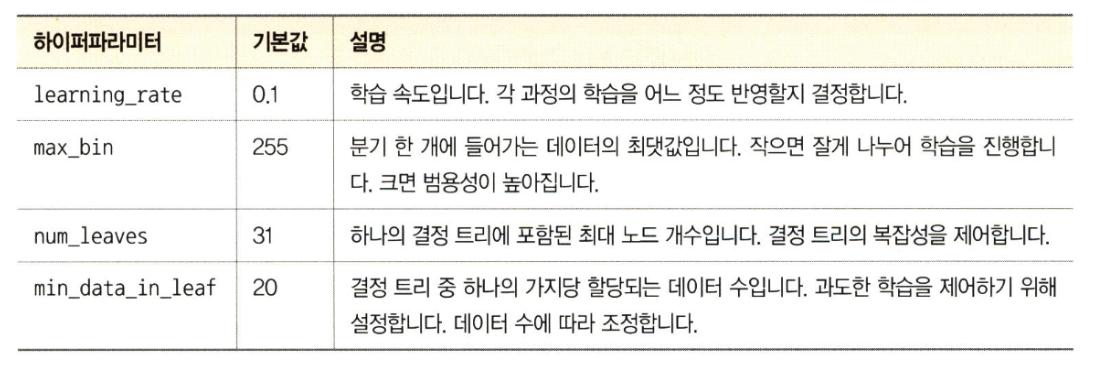

In [95]:
lgbm_params = {
    "objective":"binary",        
    "random_seed":1234,
    'min_data_in_leaf': 10,  # 리프 노드의 최소 데이터 수
    'min_gain_to_split': 0.01  # 분할을 위한 최소 정보 이득
}

In [96]:
from platform import python_version

print(python_version())

3.10.14


In [97]:
model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      callbacks=[lgb.early_stopping(stopping_rounds=5)])

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.418519


In [98]:
model_lgb.feature_importance()

array([ 30,  17, 197,  21,  11, 244,  28,   2,  19,   1], dtype=int32)

<Axes: >

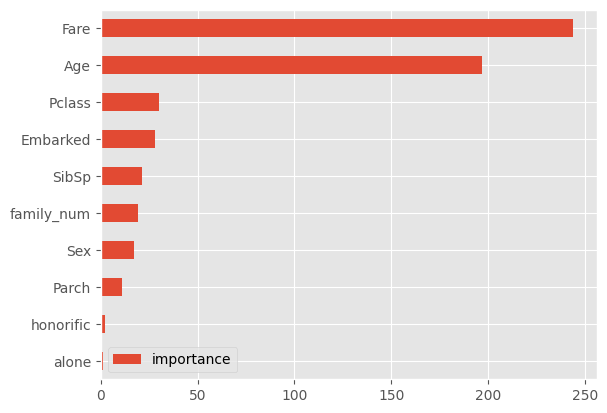

In [99]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

In [100]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_valid, np.round(y_pred))

0.8603351955307262